In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from math import sqrt
import statistics


#
import matplotlib as mpl
import csv

#
import seaborn as sea
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sea.color_palette()

#sklearn modules for Model Selection:

    


In [2]:
df = pd.read_csv("BankChurners.csv") 

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [6]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct'], float64: ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], object: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']}

In [7]:
numeric_data = ["CLIENTNUM","Customer_Age","Months_on_book","Credit_Limit","Total_Revolving_Bal","Total_Relationship_Count","Contacts_Count_12_mon","Contacts_Count_12_mon",
                     "Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio",
                     "Months_Inactive_12_mon", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                     "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
categorical_data = ["Attrition_Flag","Gender","Marital_Status","Card_Category"]
ordinal_data = ["Education_Level","Income_Category","Dependent_count"]

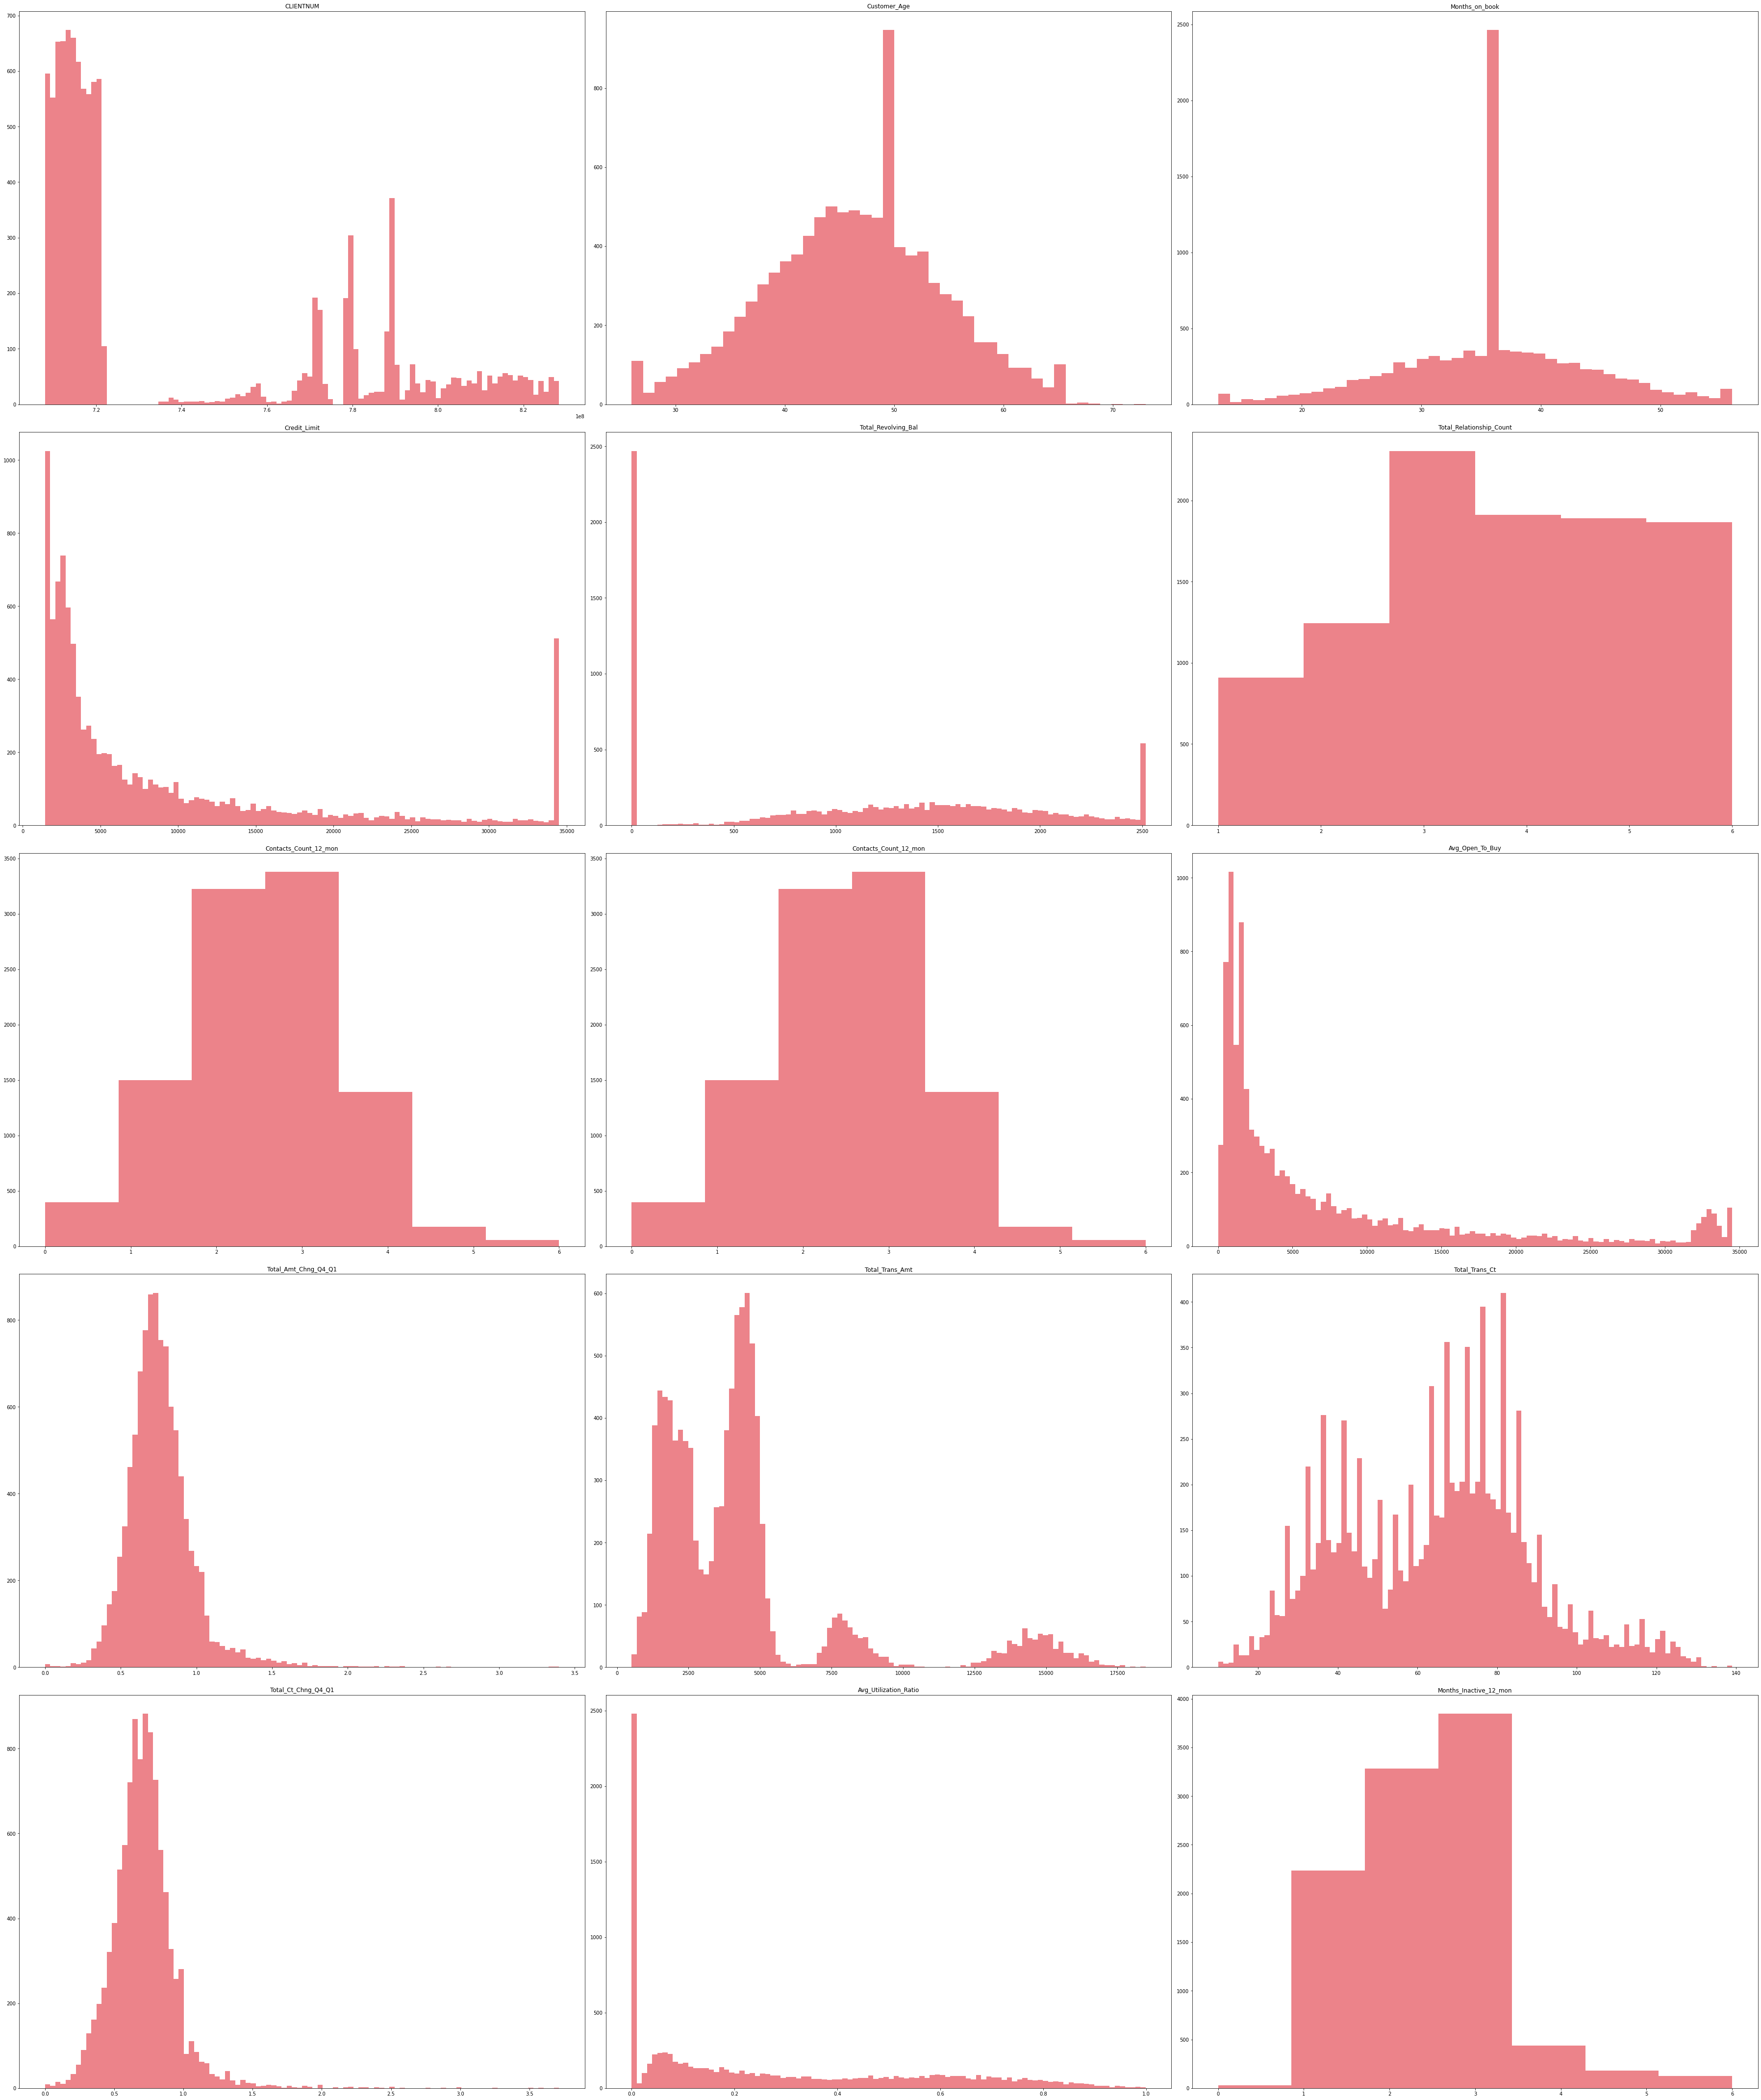

In [8]:
#Histograms:
headers = ["CLIENTNUM","Customer_Age","Months_on_book","Credit_Limit","Total_Revolving_Bal","Total_Relationship_Count","Contacts_Count_12_mon","Contacts_Count_12_mon",
                     "Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio",
                     "Months_Inactive_12_mon"]
    
fig = plt.figure(figsize=(25, 24))
for i in range(df[headers].shape[1]):   #df2.shape[1]
    plt.subplot(6, 3, i + 1) 
    f = plt.gca()
    f.set_title(df[headers].columns.values[i])
    vals = np.size(df[headers].iloc[:, i].unique())
    if vals >= 100:
        vals = 100 
    
    plt.hist(df[headers].iloc[:, i], bins=vals, color = '#ec838a')
    plt.tight_layout(rect=[0, 0.03, 2, 3])

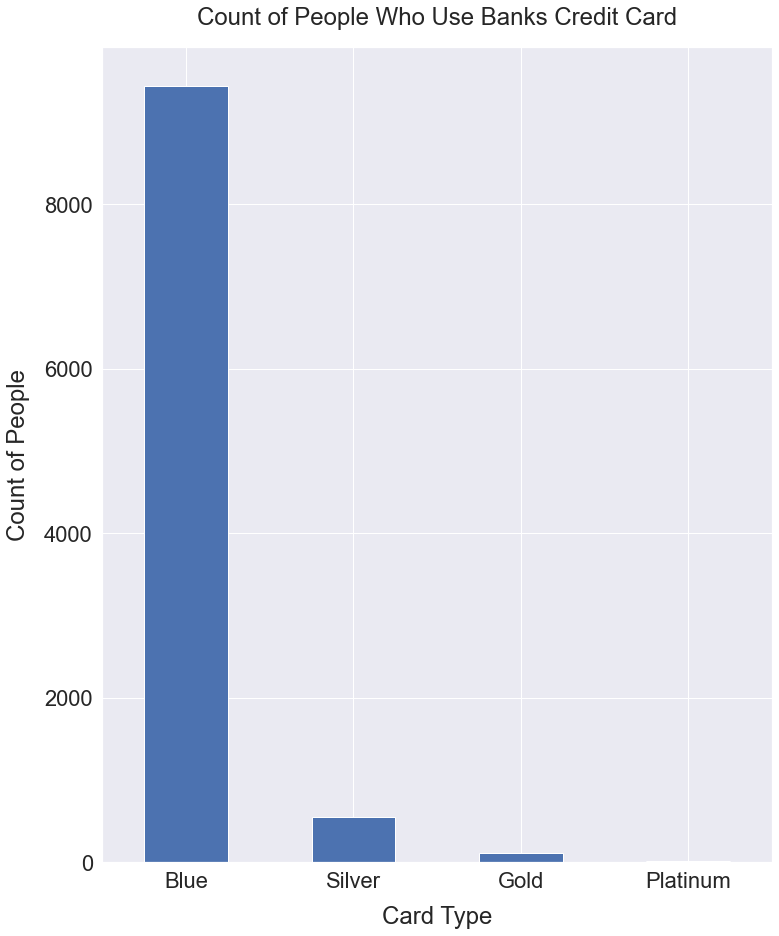

In [9]:
sea.set(font_scale=2)
df['Card_Category'].value_counts().plot(kind='bar', figsize=(12,15), rot=0)
plt.xlabel("Card Type", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People Who Use Banks Credit Card", y=1.02);

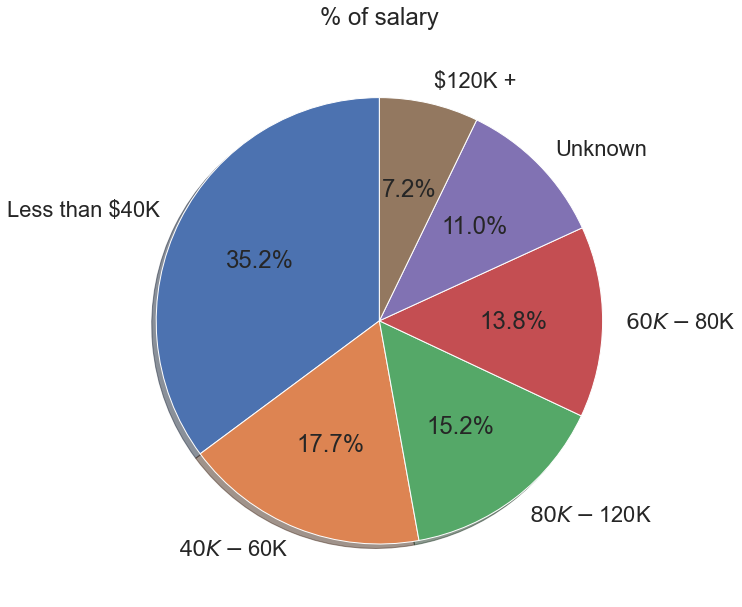

In [10]:
quantity = []
info = df["Income_Category"].value_counts()
for i in range (0,len(info)):
    quantity.append(info[i])
plt.figure(figsize=(10, 11))
plt.pie(quantity, explode = None, labels = list(info.keys()), autopct = '%0.1f%%', shadow = True, startangle = 90)
plt.title("% of salary", y=1.02);
plt.show()

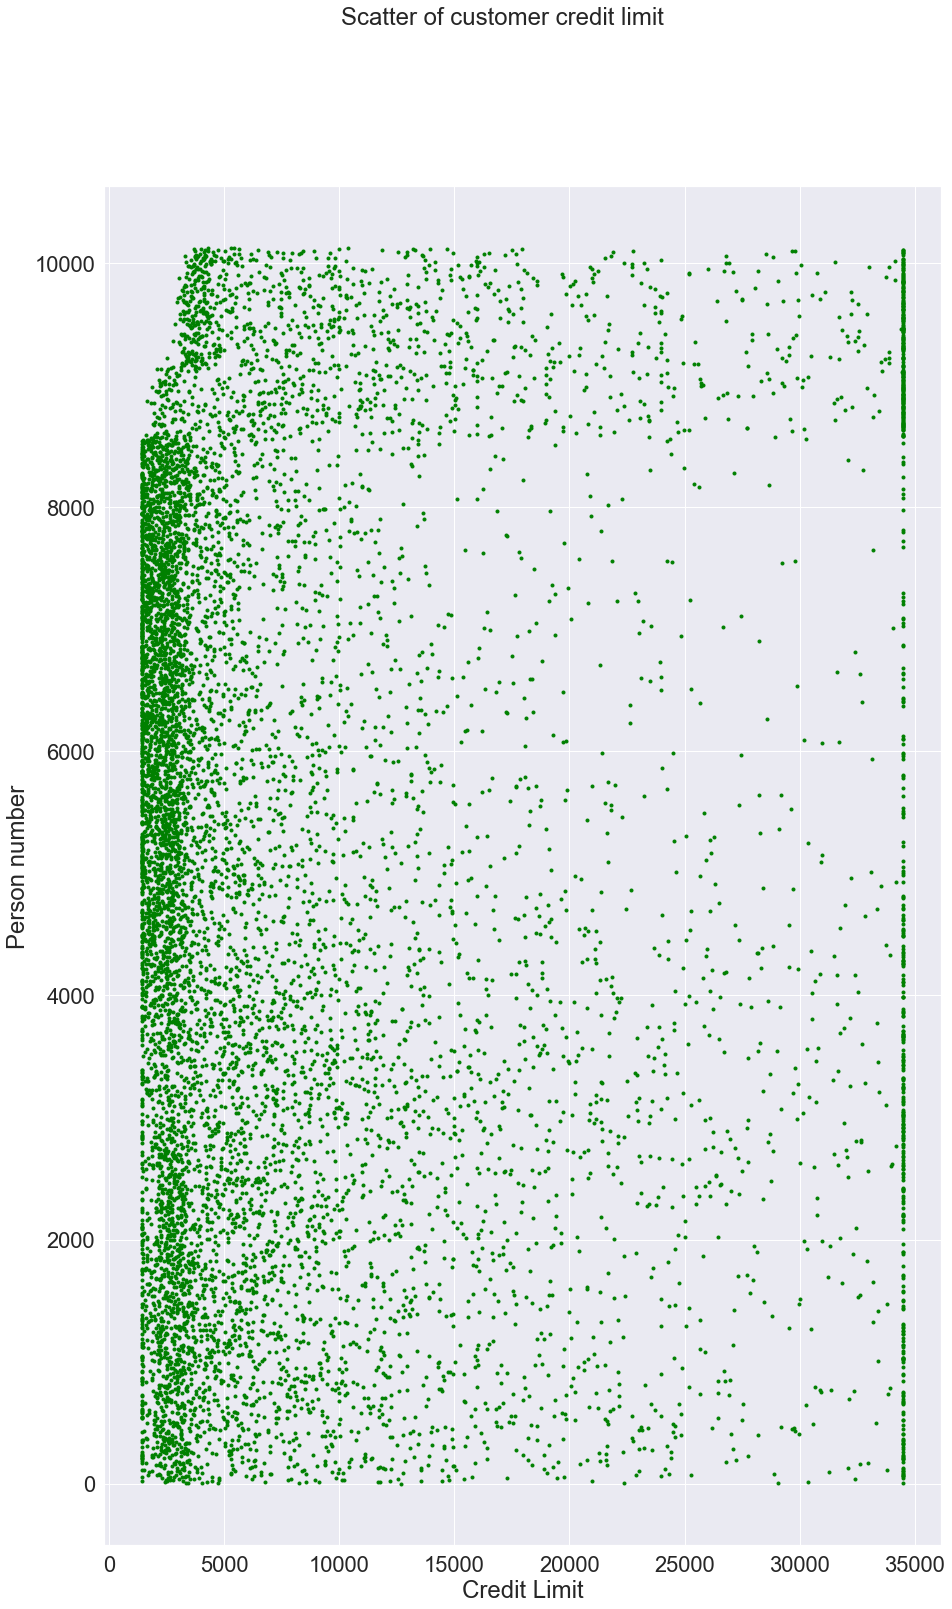

In [11]:



fig, ax = plt.subplots(figsize=(15, 25))
plt.suptitle('Scatter of customer credit limit  \n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
ax.scatter(x = df['Credit_Limit'], y = range(len(df)), marker = ".", color = "Green")
plt.xlabel("Credit Limit")
plt.ylabel("Person number")
plt.show()



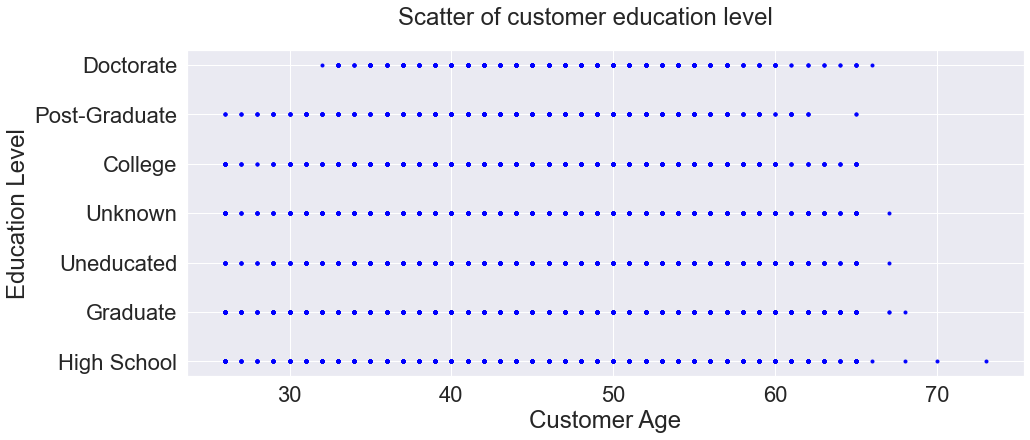

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.suptitle('Scatter of customer education level  \n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
ax.scatter(x = df['Customer_Age'], y = df['Education_Level'], marker = ".", color = "Blue")
plt.xlabel("Customer Age")
plt.ylabel("Education Level")
plt.show()

In [13]:
#mean
my_mean_array = []
names = list(df.columns)
for i in range(0,len(names)):
    try:
        var = df[names[i]]
        ans = statistics.mean(var)
        my_mean_array.append(ans)
        print('Mean of {0} = {1}'.format(names[i],ans))
    except TypeError:
        continue
        
#to avoid big numbers in future graphs         
del my_mean_array[0], my_mean_array[6], my_mean_array[6], my_mean_array[6], my_mean_array[7]

Mean of CLIENTNUM = 739177606.3336625
Mean of Customer_Age = 46.32596030413745
Mean of Dependent_count = 2.3462032191172115
Mean of Months_on_book = 35.928409203120374
Mean of Total_Relationship_Count = 3.8125802310654686
Mean of Months_Inactive_12_mon = 2.3411671768539546
Mean of Contacts_Count_12_mon = 2.4553174681544387
Mean of Credit_Limit = 8631.953698034957
Mean of Total_Revolving_Bal = 1162.8140614199665
Mean of Avg_Open_To_Buy = 7469.139636614989
Mean of Total_Amt_Chng_Q4_Q1 = 0.759940653698035
Mean of Total_Trans_Amt = 4404.086303939963
Mean of Total_Trans_Ct = 64.85869457884863
Mean of Total_Ct_Chng_Q4_Q1 = 0.7122223758269971
Mean of Avg_Utilization_Ratio = 0.2748935518909845
Mean of Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 = 0.1599974639787795
Mean of Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 = 0.84

In [14]:
#standard_deviation 
try:
    for i in range(0,len(names)):
        nu = df[names[i]]
        for i in range(len(nu)):
            summ_nu = sum(nu) 
            summ_sigma = 0
            nu_res = summ_nu/len(nu)
            summ_sigma += ((nu[i] - nu_res)*(nu[i] - nu_res))
            sigma = sqrt(summ_sigma/len(nu))
            print('Standard deviation of {0} = {1}'.format(names[i],sigma))
except TypeError and IndexError:
        next

Standard deviation of CLIENTNUM = 294414.1352659102
Standard deviation of Attrition_Flag = 790917.5357378745
Standard deviation of Customer_Age = 250370.1488653051
Standard deviation of Gender = 305409.2863360367
Standard deviation of Dependent_count = 298820.95690901956
Standard deviation of Education_Level = 259517.74489558584
Standard deviation of Marital_Status = 707219.3424362083
Standard deviation of Income_Category = 792270.9685544778
Standard deviation of Card_Category = 280694.1986681455
Standard deviation of Months_on_book = 193932.89475180983
Standard deviation of Total_Relationship_Count = 301956.3599153249
Standard deviation of Months_Inactive_12_mon = 281774.1128483538
Standard deviation of Contacts_Count_12_mon = 283981.6392816023
Standard deviation of Credit_Limit = 764208.8507992097
Standard deviation of Total_Revolving_Bal = 266122.4374180193
Standard deviation of Avg_Open_To_Buy = 241395.45834903972
Standard deviation of Total_Amt_Chng_Q4_Q1 = 290265.1150948088
Stand

In [15]:
#correlation matrix
df.corr()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266,-0.046411,0.046410
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.018189,-0.018189
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,0.019189,-0.019189
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.013693,-0.013694
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.149981,0.149981
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,0.153452,-0.153452
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,0.205772,-0.205772
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,-0.023853,0.023853
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,-0.263033,0.263032
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808,-0.000267,0.000267


In [16]:
#frequency
for i in range(len(names)):
    frequency = df[names[i]].value_counts() 
    #print(frequency)
    
    
print(my_mean_array)

[46.32596030413745, 2.3462032191172115, 35.928409203120374, 3.8125802310654686, 2.3411671768539546, 2.4553174681544387, 0.759940653698035, 64.85869457884863, 0.7122223758269971, 0.2748935518909845, 0.1599974639787795, 0.8400025708403278]


[46.32596030413745, 2.3462032191172115, 35.928409203120374, 3.8125802310654686, 2.3411671768539546, 2.4553174681544387, 0.7599406536980349, 64.85869457884863, 0.7122223758269972, 0.2748935518909845, 0.1599974639787795, 0.8400025708403278]
[46.32596030413745, 2.3462032191172115, 35.928409203120374, 3.8125802310654686, 2.3411671768539546, 2.4553174681544387, 0.759940653698035, 64.85869457884863, 0.7122223758269971, 0.2748935518909845, 0.1599974639787795, 0.8400025708403278]


<ipython-input-17-bec29fe2d1a3>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


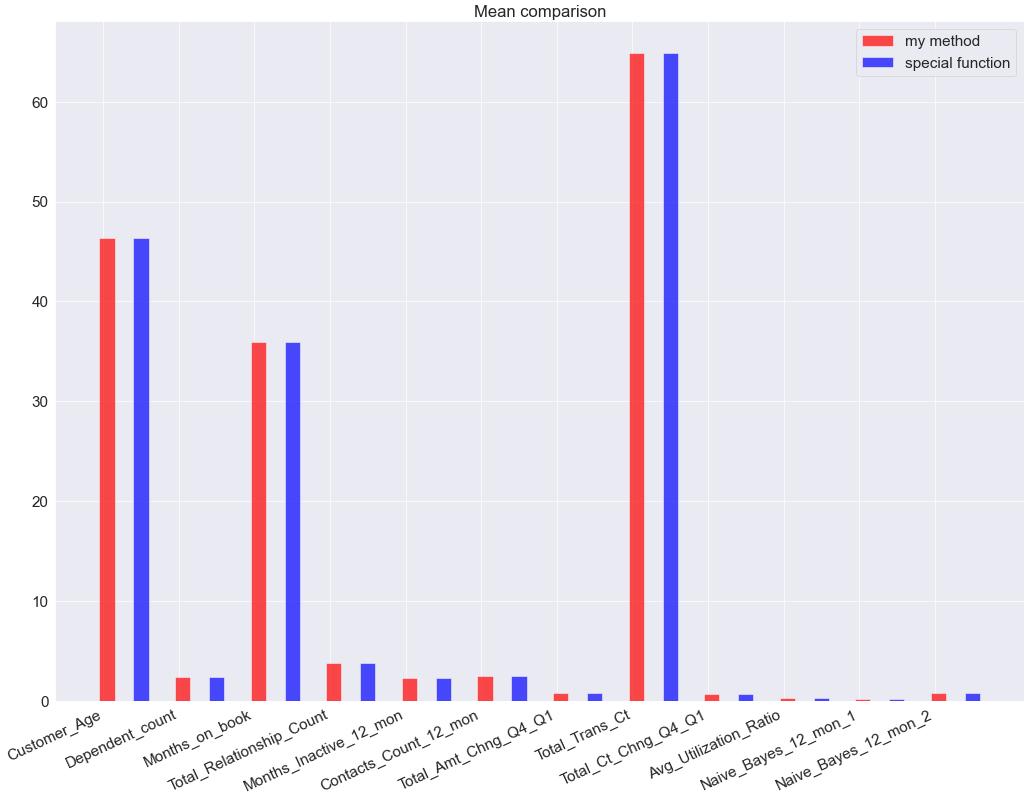

In [17]:
func_mean_array = []
mean = df.mean()
for i in range(0,len(names)):
    try :
        func_mean_array.append(mean[i])
    except IndexError:
        next 
del func_mean_array[0], func_mean_array[6], func_mean_array[6], func_mean_array[6], func_mean_array[7]        
print(func_mean_array)
print(my_mean_array)


data_names = ["Customer_Age","Dependent_count","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Total_Amt_Chng_Q4_Q1","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio","Naive_Bayes_12_mon_1","Naive_Bayes_12_mon_2"]
my_data_values = my_mean_array
func_data_values = func_mean_array

dpi = 50
fig = plt.figure(dpi = dpi, figsize = (25, 20) )
mpl.rcParams.update({'font.size': 10})

plt.title('Mean comparison')

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

xs = range(len(data_names))

plt.bar([x + 0.05 for x in xs], [ d for d in my_data_values],
        width = 0.2, color = 'red', alpha = 0.7, label = 'my method',
        zorder = 2)
plt.bar([x + 0.5 for x in xs], func_data_values,
        width = 0.2, color = 'blue', alpha = 0.7, label = 'special function',
        zorder = 2)
plt.xticks(xs, data_names)

fig.autofmt_xdate(rotation = 25)

plt.legend(loc='upper right')
fig.savefig('bars.png')